<a href="https://colab.research.google.com/github/juliocesarortiz/DataScience/blob/main/supervisado_dsai_ss2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Diplomado de Data Science & Artificial Intelligence
##Módulo de Aprendizaje Supervisado
###Predicción de Supervivientes del Titanic





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importar la biblioteca para análisis de datos
import numpy as np
# importar la biblioteca para graficación
import matplotlib.pyplot as plt
%matplotlib inline
# importar la biblioteca para manipulación y tratamiento de datos
import pandas as pd

## Lectura y preprocesamiento del conjunto de datos

In [3]:
# leer el conjunto de datos a utilizar
df = pd.read_csv('Titanic_preparar.csv')

# desplegar las primeras 5 líneas del dataframe
df.head()

# Categóricos: Survived, Sex y Embarked. Ordinales: PassengerId, Pclass.
# Continuos: Age, Fare. Discretos: SibSp, Parch.
# Ticket es una combinación de tipos de datos numéricos y alfanuméricos. Name y Cabin son alfanuméricos.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# mostrar la información condensada del contenido del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# determinar la cantidad de datos distintos en cada columna
df.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [6]:
# estadísticas de los atributos numéricos
df.describe()

# Las muestras totales son 891 o 40% del número real de pasajeros a bordo del Titanic (2224).
# Survived es una característica categórica con valores de 0 o 1.
# Alrededor del 38% de las muestras sobrevivieron mientras que la tasa de real fue del 32% (1502 de 2224).
# La mayoría de los pasajeros (> 75%) no viajaron con padres o hijos.
# Casi el 30% de los pasajeros tenían hermanos y/o cónyuge a bordo.
# Las tarifas variaron significativamente con pocos pasajeros (<1%) que pagaban hasta $ 512.
# Hubo pocos pasajeros de edad avanzada (<1%) dentro del rango de edad 65-80.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# estadísticas de los atributos string (Object)
df.describe(include=['O'])

# Los nombres son únicos en todo el conjunto de datos (count = unique = 891)
# La variable Sexo tiene 2 valores con 65% masculino (top = masculino, freq = 577/count = 891).
# Los valores de Cabin tienen varios duplicados en las muestras. O sea, varios pasajeros comparten camarote.
# Embarked toma tres valores posibles. El puerto S (SouthHampton) es utilizado por la mayoría de los pasajeros (top = S)
# La característica Ticket tiene una tasa alta (22%) de valores duplicados (único = 681).

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,646


#Suposiciones basadas en el análisis de datos
Llegamos a las siguientes suposiciones basados en el análisis de datos realizados hasta ahora. Podríamos validar más estos supuestos antes de tomar las acciones apropiadas.

###Correlacionando

1.   Queremos saber qué tan bien se correlaciona cada característica con la supervivencia.
2.   Queremos hacer esto al principio de nuestro proyecto y coincidir con estas correlaciones rápidas con correlaciones modeladas más adelante en el proyecto.

###Completando

1. Es posible que deseemos completar los datos faltantes de Age, ya que definitivamente está correlacionada con la Survived.
2. También, es posible que deseemos completar los datos de Embarked, ya que también puede correlacionarse con la Survived u otra característica importante.

###Corrigiendo.

1. Ticket puede eliminarse de nuestro análisis, ya que contiene una tasa alta de duplicados (22%) y puede no haber una correlación con Survived.
2. Cabin se puede eliminar, ya que tiene muchos datos faltantes o contiene muchos valores nulos.
3. PassengerId puede ser eliminada del conjunto de datos, ya que no contribuye para decidir Survived.
4. Name se puede eliminar ya que es relativamente no estándar y puede no contribuir directamente a decidir Survived.

###Creando

1. Es posible que deseemos crear una nueva característica llamada Alone basada en Parch y SIBSP para saber si un pasajero viajaba solo o acompañado.
2. Es posible que deseemos rediseñar Name para extraer el título como una nueva característica.
3. Es posible que deseemos crear una nueva característica para bandas de edad. Esto convierte una característica numérica continua en una característica categórica ordinal.
4. También es posible que deseemos crear una función de rango de tarifas si ayuda a nuestro análisis.

###Clasificando

También podemos agregar a nuestras suposiciones en función de la descripción original del problema que:

1. Las mujeres (Sex = female) tenían más probabilidades de haber sobrevivido.
2. Los niños (edad <?) tenían más probabilidades de haber sobrevivido.
3. Los pasajeros de clase alta (Pclass = 1) tenían más probabilidades de haber sobrevivido.

In [8]:
# Por cuestiones de tiempo, para nuestro ejemplo, eliminaremos las columnas PassengerId, Name, Ticket y Cabin
df2 = df.drop(columns=['PassengerId','Name','Ticket','Cabin'])

# mostrar la información condensada del nuevo dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Mediana= 28.0


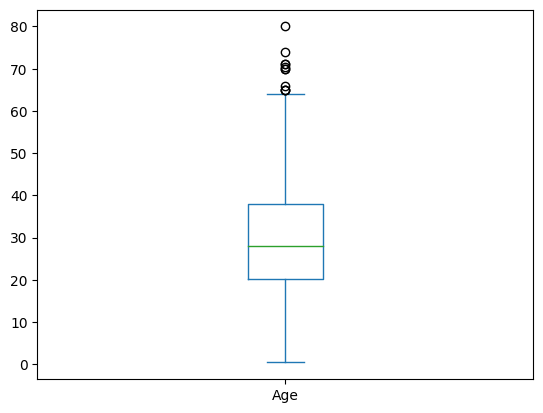

In [9]:
# Completaremos los datos faltantes para Age usando alguno de sus puntos centrales.
# Para este caso solo ilustra los datos de edad con un gráfico de caja
df2['Age'].plot(kind='box')
print("Mediana=", df2['Age'].median())

In [12]:
# sustituye datos faltantes de edad con la moda
df2['Age'].fillna(28, inplace=True)
df2.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0
Embarked,0
Alone,0


In [11]:
# Y en lugar de SibSp y Parch crearemos una característica nueva que determine
# si el pasajero viajaba solo = Alone.
df2['Alone'] = 1
df2.loc[df2['SibSp'] > 0, 'Alone'] = 0
df2.loc[df2['Parch'] > 0, 'Alone'] = 0

# elimina SibSp y Parch
df2.drop(columns=['SibSp','Parch'], inplace=True)
df2.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


In [13]:
# Convierte datos string en numéricos introduciendo variables dummy
# para los atributos de sexo y puerto de embarque
df3 = pd.get_dummies(df2,columns=['Sex','Embarked'], drop_first=True)

# muestra las primeras 5 líneas del dataframe resultante
df3.head()

,Survived,Pclass,Age,Fare,Alone,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,0,True,False,True
1,1,1,38.0,71.2833,0,False,False,False
2,1,3,26.0,7.9250,1,False,False,True
3,1,1,35.0,53.1000,0,False,False,True
4,0,3,35.0,8.0500,1,True,False,True


In [14]:
# Normaliza los datos utilizando el escalador de datos
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

dataScaler = RobustScaler()
scaler = dataScaler.fit(df3)
dataScaled = scaler.transform(df3)

# muestra el arreglo resultante
dataScaled

array([[ 0.        ,  0.        , -0.46153846, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -2.        ,  0.76923077, ..., -1.        ,
         0.        , -1.        ],
       [ 1.        ,  0.        , -0.15384615, ..., -1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -1.        ,
         0.        ,  0.        ],
       [ 1.        , -2.        , -0.15384615, ...,  0.        ,
         0.        , -1.        ],
       [ 0.        ,  0.        ,  0.30769231, ...,  0.        ,
         1.        , -1.        ]])

In [15]:
# crea un dataframe con los datos normalizados
data = pd.DataFrame(dataScaled)
data.columns = df3.columns

# muestra las primeras 5 líneas del dataframe resultante
data.head()

,Survived,Pclass,Age,Fare,Alone,Sex_male,Embarked_Q,Embarked_S
0,0.0,0.0,-0.461538,-0.312011,-1.0,0.0,0.0,0.0
1,1.0,-2.0,0.769231,2.461242,-1.0,-1.0,0.0,-1.0
2,1.0,0.0,-0.153846,-0.282777,0.0,-1.0,0.0,0.0
3,1.0,-2.0,0.538462,1.673732,-1.0,-1.0,0.0,0.0
4,0.0,0.0,0.538462,-0.277363,0.0,0.0,0.0,0.0


In [16]:
# muestra la información condensada del dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      891 non-null    float64
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   Alone       891 non-null    float64
 5   Sex_male    891 non-null    float64
 6   Embarked_Q  891 non-null    float64
 7   Embarked_S  891 non-null    float64
dtypes: float64(8)
memory usage: 55.8 KB


## Creación de conjuntos de entrenamiento y prueba

In [17]:
# crea los conjuntos de entrenamiento (80%) y prueba (20%)
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data, test_size=0.2, random_state=123)

X_train, y_train = train_df.drop(columns=["Survived"], axis=1), train_df["Survived"]
X_test, y_test = test_df.drop(columns=["Survived"], axis=1), test_df["Survived"]

# muestra la forma de los distintos conjuntos de datos obtenidos
print("Datos de entrenamiento=", X_train.shape, y_train.shape)
print("Datos de prueba=", X_test.shape, y_test.shape)

Datos de entrenamiento= (712, 7) (712,)
Datos de prueba= (179, 7) (179,)


##Creación de Modelos de Aprendizaje

### Bosque Aleatorio

In [18]:
# utiliza validación cruzada de 10 folds para evaluar el desempeño promedio
# de bosques aleatorios de 10 árboles con una profundidad máxima de 3
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rfcInicial_model = RandomForestClassifier(n_estimators=10, max_depth=3)
scores = pd.DataFrame(cross_validate(rfcInicial_model, X_train, y_train, cv=10, return_train_score=True))

# despliega los score promedio de entrenamiento y validación, así como los
# resultados obtenidos para cada uno de los 10 folds
print("score promedio de entrenamiento = ", scores['train_score'].mean())
print("score promedio de validación = ", scores['test_score'].mean())
scores

score promedio de entrenamiento =  0.8061797971918876
score promedio de validación =  0.7794600938967137


,fit_time,score_time,test_score,train_score
0,0.021601,0.004197,0.777778,0.817187
1,0.034321,0.003037,0.805556,0.795312
2,0.017081,0.003954,0.788732,0.803432
3,0.017903,0.003557,0.760563,0.812793
4,0.018852,0.002995,0.760563,0.822153
5,0.017290,0.003391,0.830986,0.817473
6,0.027170,0.003072,0.816901,0.809672
7,0.019033,0.002902,0.746479,0.801872
8,0.017139,0.002930,0.788732,0.780031
9,0.019480,0.002945,0.718310,0.801872


In [19]:
# determina, entre algunas alternativas, los mejores valores de hiperparámetros
# para construir un bosque aleatorio para el problema
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2, 3, 5, 7],
              'max_features': ['sqrt', 'log2', None],
              'n_estimators': [10, 30, 60, 100]}
rfc_grid = GridSearchCV(RandomForestClassifier(random_state=1), param_grid = parameters,
                        return_train_score=True)
rfc_grid.fit(X_train, y_train)

# despliega los mejores hiperparámetros encontrados
print("Mejores hiperparámetros\n",rfc_grid.best_params_)

Mejores hiperparámetros
 {'max_depth': 7, 'max_features': None, 'n_estimators': 30}


In [20]:
# quédate con el Bosque Aleatorio con los mejores hiperparámetros encontrados y
# despliega su score con los datos del conjunto de prueba.
rfc_model = rfc_grid.best_estimator_
rfc_model.score(X_test, y_test)

0.8379888268156425

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88       114
         1.0       0.81      0.72      0.76        65

    accuracy                           0.84       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.84      0.84      0.84       179



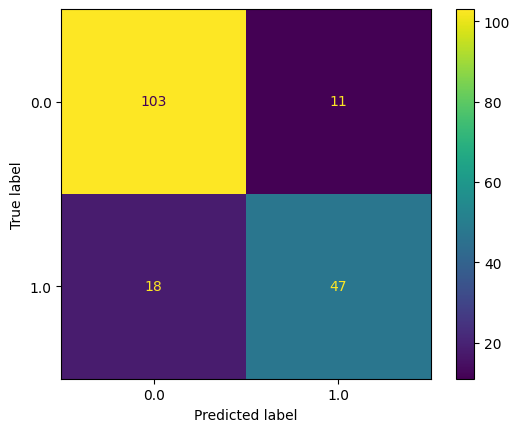

In [21]:
# calcula las matriz de confusión y las métricas de evaluación con el conjunto
# de prueba para el mejor Bosque Aleatorio
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

ConfusionMatrixDisplay.from_estimator(rfc_model, X_test, y_test)
print(classification_report(y_test, rfc_model.predict(X_test)))

### Regresión Logística

In [32]:
# utiliza validación cruzada de 10 folds para evaluar el desempeño promedio
# de una Regresión Logística con C = 0.001 y solver = 'newton-cg'
from sklearn.linear_model import LogisticRegression

lrcInicial_model = LogisticRegression(C=0.001, solver='newton-cg')
scores = pd.DataFrame(cross_validate(lrcInicial_model, X_train, y_train, cv=10, return_train_score=True))

# despliega los score promedio de entrenamiento y validación, así como los
# resultados obtenidos para cada uno de los 10 folds
print("score promedio de entrenamiento = ", scores['train_score'].mean())
print("score promedio de validación = ", scores['test_score'].mean())
scores

score promedio de entrenamiento =  0.6317116809672387
score promedio de validación =  0.6278951486697965


,fit_time,score_time,test_score,train_score
0,0.033035,0.003122,0.583333,0.637500
1,0.012008,0.002971,0.611111,0.634375
2,0.015173,0.003101,0.619718,0.634945
3,0.024786,0.009736,0.676056,0.624025
4,0.027432,0.003438,0.591549,0.636505
5,0.011313,0.001927,0.633803,0.628705
6,0.005954,0.001715,0.661972,0.625585
7,0.005388,0.001874,0.633803,0.628705
8,0.005437,0.001897,0.605634,0.638066
9,0.004884,0.001760,0.661972,0.628705


In [23]:
# determina, entre algunas alternativas, los mejores valores de hiperparámetros
# para construir un bosque aleatorio para el problema
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

parameters = {'C': np.logspace(-4, 4, 50),
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lrc_rand = RandomizedSearchCV(LogisticRegression(random_state=1), n_iter=48,
                              param_distributions = parameters,
                              return_train_score=True)
lrc_rand.fit(X_train, y_train)

# despliega los mejores hiperparámetros encontrados
print("Mejores hiperparámetros\n", lrc_rand.best_params_)

Mejores hiperparámetros
 {'solver': 'sag', 'C': 0.18420699693267145}


In [24]:
# quédate con la Regresión Logística con los mejores hiperparámetros encontrados y
# despliega su score con los datos del conjunto de prueba.
lrc_model = lrc_rand.best_estimator_
lrc_model.score(X_test, y_test)

0.8100558659217877

              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       114
         1.0       0.73      0.75      0.74        65

    accuracy                           0.81       179
   macro avg       0.79      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



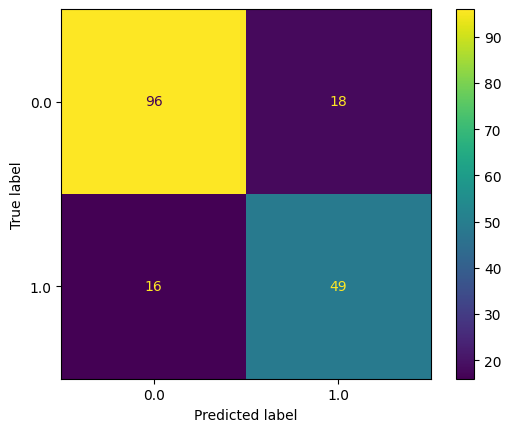

In [38]:
# calcula las matriz de confusión y las métricas de evaluación con el conjunto
# de prueba para la mejor Regresión Logística
ConfusionMatrixDisplay.from_estimator(lrc_model, X_test, y_test)
print(classification_report(y_test, lrc_model.predict(X_test)))

### Bayes Ingenuo Gaussiano

In [39]:
# utiliza validación cruzada de 10 folds para evaluar el desempeño promedio
# de Bayes Ingenuo Gaussiano
from sklearn.naive_bayes import GaussianNB

gnbc_model = GaussianNB()

scores = pd.DataFrame(cross_validate(gnbc_model, X_train, y_train, cv=10, return_train_score=True))

# despliega los score promedio de entrenamiento y validación, así como los
# resultados obtenidos para cada uno de los 10 folds
print("score promedio de entrenamiento = ", scores['train_score'].mean())
print("score promedio de validación = ", scores['test_score'].mean())
scores

score promedio de entrenamiento =  0.7759050799531981
score promedio de validación =  0.7724374021909233


,fit_time,score_time,test_score,train_score
0,0.006318,0.002087,0.791667,0.775000
1,0.003159,0.001892,0.777778,0.776563
2,0.002897,0.002111,0.760563,0.776911
3,0.002560,0.002149,0.718310,0.778471
4,0.002398,0.001730,0.718310,0.781591
5,0.003574,0.001899,0.816901,0.772231
6,0.002390,0.001683,0.788732,0.775351
7,0.002371,0.001697,0.760563,0.780031
8,0.002369,0.002080,0.802817,0.770671
9,0.002433,0.001723,0.788732,0.772231


              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84       114
         1.0       0.71      0.72      0.72        65

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



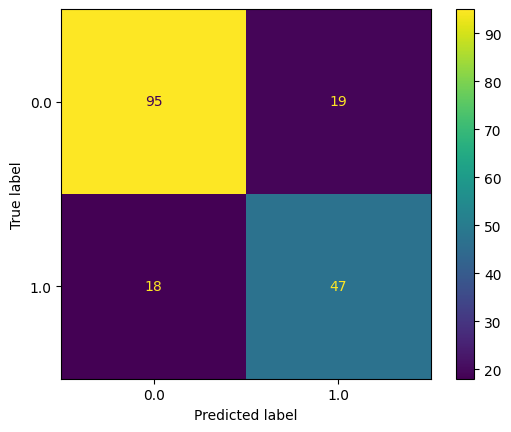

In [40]:
# calcula las matriz de confusión y métricas de evaluación para el modelo
gnbc_model.fit(X_train, y_train) # No se ha entrenado el modelo

ConfusionMatrixDisplay.from_estimator(gnbc_model, X_test, y_test)
print(classification_report(y_test, gnbc_model.predict(X_test)))

###Máquina de Vectores de Soporte

In [41]:
# utiliza validación cruzada de 10 folds para evaluar el desempeño promedio
# de una Máquina de Vectores de Soporte con un parámetro de regularización de
# 0.01 y un kernel polinomial
from sklearn.svm import SVC

svmc_model = SVC(C=0.01, kernel="poly")

scores = pd.DataFrame(cross_validate(svmc_model, X_train, y_train, cv=10, return_train_score=True))

# despliega los score promedio de entrenamiento y validación, así como los
# resultados obtenidos para cada uno de los 10 folds
print("score promedio de entrenamiento = ", scores['train_score'].mean())
print("score promedio de validación = ", scores['test_score'].mean())
scores

score promedio de entrenamiento =  0.6443498927457098
score promedio de validación =  0.6405320813771518


,fit_time,score_time,test_score,train_score
0,0.013476,0.003059,0.611111,0.642188
1,0.012571,0.002903,0.611111,0.640625
2,0.012425,0.002864,0.647887,0.650546
3,0.015822,0.003218,0.690141,0.648986
4,0.012623,0.003589,0.605634,0.641186
5,0.012671,0.003084,0.647887,0.636505
6,0.022420,0.006315,0.690141,0.638066
7,0.013241,0.003067,0.633803,0.639626
8,0.012825,0.002976,0.619718,0.653666
9,0.012519,0.002934,0.647887,0.652106


In [42]:
# determina, entre algunas alternativas, los mejores valores de hiperparámetros
# para construir una Máquina de Vectores de Soporte para el problema
parameters = {'C': [0.01, 0.1, 1, 10, 50],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svmc_grid = GridSearchCV(SVC(random_state=1), param_grid = parameters,
                         return_train_score=True)
svmc_grid.fit(X_train, y_train)
print("Mejores hiperparámetros\n",svmc_grid.best_params_)

Mejores hiperparámetros
 {'C': 10, 'kernel': 'poly'}


In [43]:
# quédate con la Máquina de Vectores de Soporte con los mejores hiperparámetros
# encontrados y despliega su score con los datos del conjunto de prueba.
svmc_model = svmc_grid.best_estimator_
svmc_model.score(X_test, y_test)

0.8603351955307262

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       114
         1.0       0.87      0.72      0.79        65

    accuracy                           0.86       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.86      0.86      0.86       179



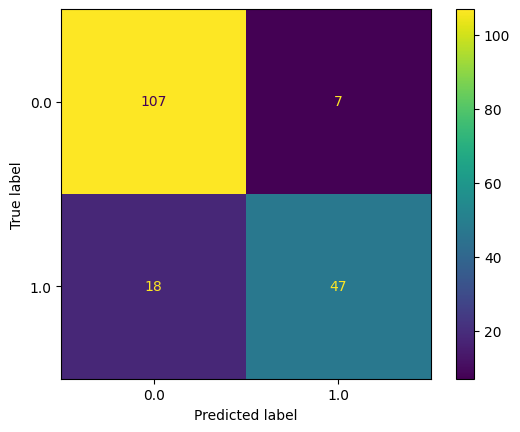

In [44]:
# calcula las matriz de confusión y las métricas de evaluación con el conjunto
# de prueba para el mejor Bosque Aleatorio
ConfusionMatrixDisplay.from_estimator(svmc_model, X_test, y_test)
print(classification_report(y_test, svmc_model.predict(X_test)))

## Mejor Modelo de Aprendizaje mediante Curva ROC

<Figure size 640x480 with 0 Axes>

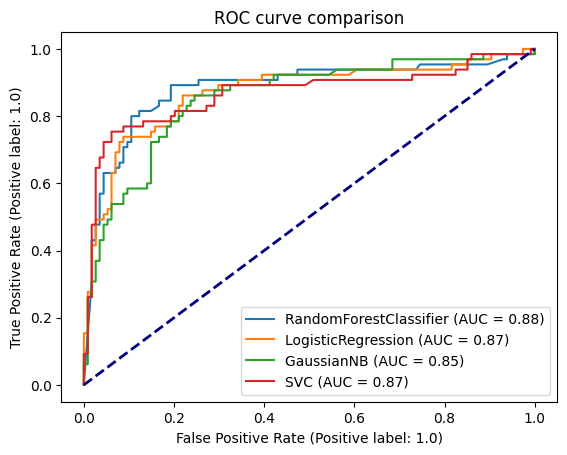

In [45]:
# calcular y mostrar las curvas ROC de cada modelo de aprendizaje
# y sus métricas de área bajo la curva (AUC)
from sklearn.metrics import RocCurveDisplay

plt.figure()
lw = 2
disp = RocCurveDisplay.from_estimator(rfc_model, X_test, y_test)
RocCurveDisplay.from_estimator(lrc_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(gnbc_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(svmc_model, X_test, y_test, ax=disp.ax_)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.title("ROC curve comparison")
plt.legend(loc="lower right")
plt.show()

##Conclusión: El modelo de **Bosque Aleatorio** fue el mejor con un AUC de 0.88